<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [2]:
import pandas as pd
import unicodedata
import random
from train import training, load_data, evaluate
from util import df_tolist
from sklearn.utils import shuffle

In [4]:
# change to dataframe to Spacy format
# wikidata featured articles scraped text
df = pd.read_csv('E:/Sharpest_Mind/WikipediaCitation/src/Notebooks/new_traindata.csv', encoding = 'utf8')
df = df[(df['Statements'].str.split().str.len() >10)].reset_index(drop=True)
df['Statements'] = df['Statements'].astype(str)
df =shuffle(df)
df = df.drop_duplicates()
print(df.shape)
print(df.label.value_counts())
df.head()

(35672, 2)
1    19486
0    16186
Name: label, dtype: int64


,Statements,label
27633,Pinkerton is the second studio album by Americ...,0
23669,The film found an audience when released on ho...,0
12145,"In the 1874 general election, Disraeli was ret...",1
6802,Newton and Cowper attempted to present a poem ...,1
6554,Hutchinson was now banished from the colony an...,1


In [5]:
df1 = df[df['label']==1]
df2 = df[df['label']==0]
df3=pd.concat([df1[:10000],df2[:10000]])
df3.label.value_counts()

1    10000
0    10000
Name: label, dtype: int64

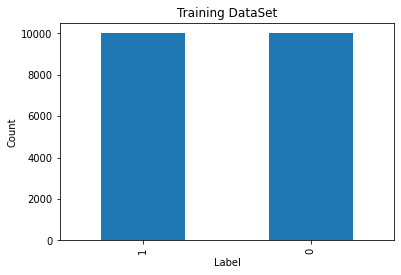

In [6]:
import matplotlib.pyplot as plt
ax = df3['label'].value_counts().plot(kind='bar',
                                    figsize=(6,4), title = 'Training DataSet')
plt.legend
ax.set_xlabel("Label")
ax.set_ylabel("Count")

plt.savefig('label_count.png')
plt.show()

In [7]:
df3.head()

,Statements,label
12145,"In the 1874 general election, Disraeli was ret...",1
6802,Newton and Cowper attempted to present a poem ...,1
6554,Hutchinson was now banished from the colony an...,1
15988,"As to the fighting in a turret, one doesn't su...",1
1153,"On 23 June, he took a break and went ""geologis...",1


In [8]:
# Processing the final format of training and validation data
# Calling the load_data() function 

(train_texts, train_cats), (dev_texts, dev_cats) = load_data(df3,split=0.8)
train_data = list(zip(train_texts,[{'cats': cats} for cats in train_cats]))
print(train_data[:1])
dev_data = list(zip(dev_texts,[{'cats': cats} for cats in dev_cats]))
print(dev_data[:1])


[("He finds Misako and they go to her apartment. After alternating failed attempts by him to seduce her and them to kill each other, she succumbs to his advances when he promises to kill her. Afterwards, he finds he cannot as he has fallen in love with her. In a state of confusion he wanders the streets and passes out on the side of the road. The next day he finds his wife at Yabuhara's club. She tries to seduce him, then fakes hysteria and tells him Yabuhara paid her to kill him and that the three men he had killed had stolen from Yabuhara's diamond smuggling operation, and the foreigner was an investigator sent by the supplier. Unmoved, Hanada kills her, gets drunk and waits for Yabuhara to return. Yabuhara arrives already dead with a bullet hole through the centre of his forehead.", {'cats': {'POSITIVE': False, 'NEGATIVE': True}})]
[('Norman Shrapnel, in his obituary of Powell, speculates whether the author ever regretted creating the "maddening, mysterious, apparently indestructibl

E:\Sharpest_Mind\WikipediaCitation\src\Notebooks\util.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tuples'] = df.apply(lambda row: (row[df.columns[0]], row[df.columns[1]]), axis=1)


In [11]:
# Converting the dataframe into a list of tuples
# change to dataframe to Spacy format
# wikidata citation needed text
df4 = pd.read_csv('E:/Sharpest_Mind/WikipediaCitation/data/processed/csv_files/sort/Citation_needed_wiki.csv', encoding = 'ISO-8859-1')
df4_test = shuffle(df4)
#df4_1 = df4[df4['label']==1] 
#df4_0 = df4[df4['label']==0]
#df4_test = pd.concat([df4)
test1 =df_tolist(df4_test[:4000])
test_texts1, test_cats1 = zip(*test1)
test_cats1 = [{"POSITIVE": bool(y), "NEGATIVE": not bool(y)} for y in test_cats1]
test_data1 = list(zip(test_texts1,[{'cats': cats} for cats in test_cats1]))
print(len(test_data1))


4000


E:\Sharpest_Mind\WikipediaCitation\src\Notebooks\util.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df.columns[0]] = (df[df.columns[0]].map(lambda x: unicodedata.normalize('NFKD', str(x))))


In [12]:
# Converting the dataframe into a list of tuples
# wikidata random articles -biography section
df5 = pd.read_csv('E:/Sharpest_Mind/WikipediaCitation/data/processed/csv_files/sort/wiki_data_test.csv', encoding = 'ISO-8859-1')
df5 = shuffle(df5)
df5_1 = df5[df5['Label']==1] 
df5_0 = df5[df5['Label']==0]
df5_test = pd.concat([df5_1[8000:],df5_0[8000:]])
test2 =df_tolist(df5_test)

random.shuffle(test2)

test_texts2, test_cats2 = zip(*test2)
test_cats2 = [{"POSITIVE": bool(y), "NEGATIVE": not bool(y)} for y in test_cats2]
test_data2 = list(zip(test_texts2,[{'cats': cats} for cats in test_cats2]))
print(len(test_data2))

3980


In [13]:
print(len(train_data))
print(len(test_data1))
print(len(test_data2))
print(len(dev_data))

16000
4000
3980
4000


In [14]:
# no regularization
train_results, dev_results, test_results = training(train_texts, train_cats, dev_texts, dev_cats, test_texts1, test_cats1, L2 = 0, 
                                                     learn_rate = 0.001, n_iter = 3, output_dir='model_artifactnewdatatest1-2e-5')

Training the model...
LOSS 	A_train	A_dev	A_test	  P  	  R  	  F  


KeyboardInterrupt: 

In [ ]:
# Model 1 - cnn, L2 =2e-5 test1 dec = decaying(10.0, 1.0, 0.001)
train_results1, dev_results1, test_results1 = training(train_texts, train_cats, dev_texts, dev_cats, test_texts1, test_cats1, L2 = 2e-5, 
                                                     learn_rate = 0.001, n_iter = 3, output_dir='model_artifactnewdatatest1-2e-5')

Training the model...
LOSS 	A_train	A_dev	A_test	  P  	  R  	  F  
17.7978	0.5035	0.4860	0.5007	0.5035	1.0000	0.6698
17.8004	0.5035	0.4860	0.5007	0.5035	1.0000	0.6698


In [11]:
# Model 2 - cnn, L2 0.0001  test1 (10.0, 1.0, 0.001)
train_results2, dev_results2, test_results2 = training(train_texts, train_cats, dev_texts, dev_cats, test_texts1, test_cats1, L2 = 2e-5, 
                                                     learn_rate = 0.0001, n_iter = 3, output_dir='model_artifactnewdatatestLR0.0001')

Training the model...
LOSS 	A_train	A_dev	A_test	  P  	  R  	  F  
17.0004	0.8874	0.8657	0.6573	0.8919	0.8820	0.8870
7.1839	0.9707	0.9482	0.6761	0.9642	0.9778	0.9709
2.2498	0.9794	0.9702	0.7144	0.9852	0.9735	0.9793
Saved model to model_artifactnewdatatestLR0.0001


In [25]:
# Model 2 - cnn, L2 0.0001  test1 (10.0, 1.0, 0.001)
train_results2, dev_results2, test_results2 = training(train_texts, train_cats, dev_texts, dev_cats, test_texts1, test_cats1, L2 = 1e-5, 
                                                     learn_rate = 0.0001, n_iter = 3, output_dir='model_artifactnewdatatestL1e-5')

Training the model...
LOSS 	A_train	A_dev	A_test	  P  	  R  	  F  
16.8656	0.8835	0.8672	0.6676	0.9383	0.8214	0.8759
7.0666	0.9524	0.9470	0.6678	0.9810	0.9227	0.9510
2.7969	0.9826	0.9697	0.6988	0.9695	0.9966	0.9829
Saved model to model_artifactnewdatatestL1e-5


In [12]:
# Model 3 - cnn, L2 2e-3 (10.0, 1.0, 0.001)
train_results3, dev_results3, test_results3 = training(train_texts, train_cats, dev_texts, dev_cats, test_texts1, test_cats1, L2 = 2e-5, 
                                                     learn_rate = 0.01, n_iter = 3, output_dir='model_artifactnewdatatest1LR0.01')

Training the model...
LOSS 	A_train	A_dev	A_test	  P  	  R  	  F  
16.7681	0.9737	0.9707	0.7649	0.9530	0.9968	0.9744
4.6759	0.9830	0.9752	0.7264	0.9692	0.9978	0.9833
2.7370	0.9789	0.9765	0.7164	0.9611	0.9983	0.9793
Saved model to model_artifactnewdatatest1LR0.01


In [14]:
#dec = decaying(0.6, 0.2, 1e-4)
train_results4, dev_results4, test_results4 = training(train_texts, train_cats, dev_texts, dev_cats, test_texts1, test_cats1, L2 = 2e-4, 
                                                     learn_rate = 0.01, n_iter =3,  output_dir='model_artifactnewdatatestLRD')

Training the model...
LOSS 	A_train	A_dev	A_test	  P  	  R  	  F  
17.0418	0.9582	0.9682	0.8967	0.9241	0.9986	0.9599
6.1715	0.9719	0.9695	0.8769	0.9479	0.9988	0.9726
3.8690	0.9725	0.9697	0.8149	0.9485	0.9994	0.9733
Saved model to model_artifactnewdatatestLRD


In [13]:
# Model 3 - cnn, L2 2e-3 #dec = decaying(10.0, 1.0, 0.001)
train_results5, dev_results5, test_results5 = training(train_texts, train_cats, dev_texts, dev_cats, test_texts1, test_cats1, L2 = 2e-4, 
                                                     learn_rate = 0.01, n_iter=3,  output_dir='model_artifact20K_HP3')

Training the model...
LOSS 	A_train	A_dev	A_test	  P  	  R  	  F  
16.8913	0.9598	0.9675	0.8834	0.9279	0.9973	0.9613
6.0275	0.9386	0.9700	0.8354	0.9632	0.9121	0.9370
3.6821	0.9691	0.9712	0.8309	0.9468	0.9940	0.9699
Saved model to model_artifact20K_HP3


In [18]:
# Model 3 - cnn, L2 2e-3  dec = decaying(10.0, 1.0, 0.001)
train_results6, dev_results6, test_results6 = training(train_texts, train_cats, dev_texts, dev_cats, test_texts2, test_cats2, L2 = 2e-4, 
                                                     learn_rate = 0.00001, n_iter=3,  output_dir='model_artifactnewdatatest12')

Training the model...
LOSS 	A_train	A_dev	A_test	  P  	  R  	  F  
17.7899	0.5387	0.5125	0.2324	0.5221	0.9300	0.6687
17.6254	0.7471	0.6892	0.3839	0.7627	0.7184	0.7399
14.2752	0.8471	0.8072	0.4721	0.8449	0.8507	0.8478
Saved model to model_artifactnewdatatest12


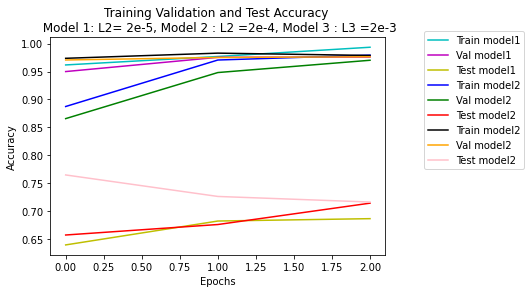

In [21]:
import matplotlib.pyplot as plt

accuracy_train1 = [(d['textcat_a']) for d in train_results1]
accuracy_dev1 = [(d['textcat_a']) for d in dev_results1]
accuracy_test1 = [(d['textcat_a']) for d in test_results1]
accuracy_train2 = [(d['textcat_a']) for d in train_results2]
accuracy_dev2 = [(d['textcat_a']) for d in dev_results2]
accuracy_test2 = [(d['textcat_a']) for d in test_results2]
accuracy_train3 = [(d['textcat_a']) for d in train_results3]
accuracy_dev3 = [(d['textcat_a']) for d in dev_results3]
accuracy_test3 = [(d['textcat_a']) for d in test_results3]
epochs = range(0,3)
plt.plot(epochs, accuracy_train1, 'c', label='Train model1')
plt.plot(epochs, accuracy_dev1, 'm', label='Val model1')
plt.plot(epochs, accuracy_test1, 'y', label='Test model1')
plt.plot(epochs, accuracy_train2, 'b', label='Train model2')
plt.plot(epochs, accuracy_dev2, 'g', label='Val model2')
plt.plot(epochs, accuracy_test2, 'r', label='Test model2')
plt.plot(epochs, accuracy_train3, 'k', label='Train model2')
plt.plot(epochs, accuracy_dev3, color='orange', label='Val model2')
plt.plot(epochs, accuracy_test3, color='pink', label='Test model2')
plt.title('Training Validation and Test Accuracy \n Model 1: L2= 2e-5, Model 2 : L2 =2e-4, Model 3 : L3 =2e-3' )
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

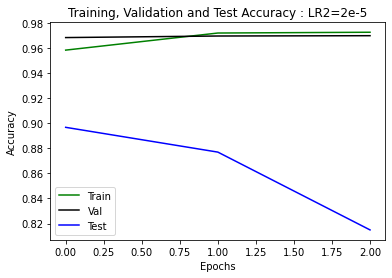

In [24]:
import matplotlib.pyplot as plt

accuracy_train4 = [(d['textcat_a']) for d in train_results4]
accuracy_dev4 = [(d['textcat_a']) for d in dev_results4]
accuracy_test4 = [(d['textcat_a']) for d in test_results4]

epochs = range(0,3)
plt.plot(epochs, accuracy_train4, 'g', label='Train')
plt.plot(epochs, accuracy_dev4, 'k', label='Val')
plt.plot(epochs, accuracy_test4, 'b', label='Test')

plt.title('Training, Validation and Test Accuracy : LR2=2e-5')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
accuracy_train2 = [(d['textcat_a']) for d in train_results2]
accuracy_dev2 = [(d['textcat_a']) for d in dev_results2]
accuracy_test2 = [(d['textcat_a']) for d in test_results2]
epochs = range(0,5)
plt.plot(epochs, accuracy_train2, 'r', label='Train')
plt.plot(epochs, accuracy_dev2, 'c', label='Val')
plt.plot(epochs, accuracy_test2, 'y', label='Test')
plt.title('Training, Validation and Test Accuracy  Model2 L2= 2e-4')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
accuracy_train3 = [(d['textcat_a']) for d in train_results3]
accuracy_dev3 = [(d['textcat_a']) for d in dev_results3]
accuracy_test3 = [(d['textcat_a']) for d in test_results3]
epochs = range(0,5)
plt.plot(epochs, accuracy_train3, 'r', label='Train')
plt.plot(epochs, accuracy_dev3, 'c', label='Val')
plt.plot(epochs, accuracy_test3, 'y', label='Test')
plt.title('Training and Validation Accuracy  Model3 L2= 2e-3')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

precision_test1 = [(d['textcat_p']) for d in test_results1]
precision_test2 = [(d['textcat_p']) for d in test_results2]
precision_test3 = [(d['textcat_p']) for d in test_results3]
#precision_test4 = [(d['textcat_p']) for d in test_result4]

epochs = range(0,5)
plt.plot(epochs, precision_test1, 'g', label='L2=2e-5')
plt.plot(epochs, precision_test2, 'b', label='L2=2e-4')
plt.plot(epochs, precision_test3, 'r', label='L2=2e-3')
#plt.plot(epochs, precision_test4, 'c', label='4')
plt.title('Test precision')
plt.xlabel('Epochs')
plt.ylabel('precision')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

precision_test1 = [(d['textcat_a']) for d in test_results1]
precision_test2 = [(d['textcat_a']) for d in test_results2]
precision_test3 = [(d['textcat_a']) for d in test_result3]
precision_test4 = [(d['textcat_a']) for d in test_result4]

epochs = range(0,5)
plt.plot(epochs, precision_test1, 'g', label='1')
plt.plot(epochs, precision_test2, 'b', label='2')
plt.plot(epochs, precision_test3, 'r', label='3')
plt.plot(epochs, precision_test4, 'c', label='4')
plt.title('Test accuracy ')
plt.xlabel('Epochs')
plt.ylabel('precision')
plt.legend()
plt.show()

In [ ]:
import spacy
# Testing the model = https://en.wikipedia.org/wiki/Che_Guevara - positive sentence
loaded_model = spacy.load('model_artifactnewdatatest1LR0.01L22E-4')
test_text= "Such positions also allowed him to play a central role in training the militia forces who repelled the Bay of Pigs Invasion and bringing the Soviet nuclear-armed ballistic missiles to Cuba which precipitated the 1962 Cuban Missile Crisis "
doc=loaded_model(test_text)
doc.cats

In [ ]:
spacy.displacy.render(doc, style='ent')

In [ ]:
# Testing the model - negative sentences
test_text="Later, during the Age of Exploration, maps became progressively more accurate for navigation needs and were often sprinkled with sketches and drawings such as sailing ships showing the direction of trade winds, little trees and mounds to represent forests and mountains and of course, plenty of sea creatures and exotic natives much of them imaginary. "
doc=loaded_model(test_text)
doc.cats

In [ ]:
# Testing the model - negative sentence
test_text="Later, during the Age of Exploration, maps became progressively more accurate for navigation needs and were often sprinkled with sketches and drawings such as sailing ships showing the direction of trade winds, little trees and mounds to represent forests and mountains and of course, plenty of sea creatures and exotic natives much of them imaginary. "
doc=loaded_model(test_text)
doc.cats

In [ ]:
#positive sentence 

test_text1 = 'Anthropomorphic maps date back to when Sebastian Münster used a queen to depict Europe in 1570.'
doc=loaded_model(test_text1)
doc.cats

In [ ]:
#positive sentence 

test_text = 'The leading panoramic map artists in the U.S.A. were Herman Brosius, Camille N. Drie, Thaddeus Mortimer Fowler, Paul Giraud, Augustus Koch, D. D. Morse, Henry Welge, and A. L. Westyard.'
doc=nlp(test_text)
doc.cats